# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [82]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [97]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
#Desired number of cities - 500
numcities = 1250
SEED = 50
#set seed
np.random.seed(SEED)


In [98]:
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90, high=90, size=numcities)
lngs = np.random.uniform(low=-180, high=180, size=numcities)
lat_lngs = zip(lats, lngs)

In [99]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

549

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [100]:
#import url
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
# Build query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
#query_url = url +"appid=" + api_keys + "&q+" 
query_url
#check data layers in response
#for city in cities:
    #response = requests.get(query_url + city).json()
#print(json.dumps(response, indent=4, sort_keys=True))

'http://api.openweathermap.org/data/2.5/weather?appid=d6856a64a1f52963e3d83db0ea1e2d2a&units=imperial&q='

In [101]:
#Loop through the list of cities and perform a request for data on each city
citylist = []
print("City Data")
for city in cities:
    try:
        print(f"Processing records of | {city}")
        response = requests.get(query_url + city).json()
        name = (response["name"])
        print(response)
        
        lat = (response["coord"]["lat"])
        print(lat)
        lng = (response["coord"]["lon"])
        
        temp = (response["main"]["temp"])
        humidity = (response["main"]["humidity"])
        cloudiness = (response["clouds"]["all"])
        windspeed = (response["wind"]["speed"])
        country = (response["sys"]["country"])
        date = (response["dt"])
        city_dictionary = {"City Name": name, "Lattitude": lat, "Longitude": lng, "Temperature": temp, "Humidity": humidity, "Cloudiness": cloudiness,"Windspeed": windspeed, "Country": country, "Date": date}
        citylist.append(city_dictionary)
    except(KeyError):
        print("City not found")
        next
print(citylist)

City Data
Processing records of | tabiauea
City not found
Processing records of | tuatapere
{'coord': {'lon': 167.68, 'lat': -46.13}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 39, 'feels_like': 34.09, 'temp_min': 39, 'temp_max': 39, 'pressure': 1011, 'humidity': 83}, 'wind': {'speed': 3, 'deg': 359, 'gust': 7}, 'clouds': {'all': 14}, 'dt': 1592522702, 'sys': {'type': 3, 'id': 2008959, 'country': 'NZ', 'sunrise': 1592512316, 'sunset': 1592543356}, 'timezone': 43200, 'id': 2180815, 'name': 'Tuatapere', 'cod': 200}
-46.13
Processing records of | te anau
{'coord': {'lon': 167.72, 'lat': -45.42}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 36.82, 'feels_like': 32.49, 'temp_min': 36.82, 'temp_max': 36.82, 'pressure': 1027, 'humidity': 80, 'sea_level': 1027, 'grnd_level': 1000}, 'wind': {'speed': 1.16, 'deg': 99}, 'clouds': {'all':

City not found
Processing records of | west odessa
{'coord': {'lon': -102.5, 'lat': 31.84}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 102.18, 'feels_like': 93.29, 'temp_min': 100.4, 'temp_max': 104, 'pressure': 1010, 'humidity': 8}, 'visibility': 16093, 'wind': {'speed': 8.88, 'deg': 273}, 'clouds': {'all': 1}, 'dt': 1592522703, 'sys': {'type': 1, 'id': 5167, 'country': 'US', 'sunrise': 1592480665, 'sunset': 1592531887}, 'timezone': -18000, 'id': 5533366, 'name': 'West Odessa', 'cod': 200}
31.84
Processing records of | nata
{'coord': {'lon': -80.52, 'lat': 8.33}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 77, 'feels_like': 81.48, 'temp_min': 77, 'temp_max': 77, 'pressure': 1010, 'humidity': 72}, 'wind': {'speed': 3.24, 'deg': 39}, 'rain': {'1h': 1.9}, 'clouds': {'all': 99}, 'dt': 1592522703, 'sys': {'type': 3, 'id': 2011234,

{'coord': {'lon': 3.91, 'lat': 46.42}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 51.89, 'feels_like': 48.56, 'temp_min': 51.8, 'temp_max': 52, 'pressure': 1018, 'humidity': 81}, 'visibility': 10000, 'wind': {'speed': 4.36, 'deg': 236}, 'clouds': {'all': 20}, 'dt': 1592522704, 'sys': {'type': 1, 'id': 6499, 'country': 'FR', 'sunrise': 1592538689, 'sunset': 1592595604}, 'timezone': 7200, 'id': 2980080, 'name': 'Saint-François', 'cod': 200}
46.42
Processing records of | mar del plata
{'coord': {'lon': -57.56, 'lat': -38}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 51.22, 'feels_like': 46.58, 'temp_min': 48.2, 'temp_max': 54, 'pressure': 1006, 'humidity': 93}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 320}, 'clouds': {'all': 32}, 'dt': 1592522704, 'sys': {'type': 1, 'id': 8305, 'country': 'AR', 'sunrise': 159247

{'coord': {'lon': -50.01, 'lat': -24.79}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 57.6, 'feels_like': 57.07, 'temp_min': 57.6, 'temp_max': 57.6, 'pressure': 1019, 'humidity': 95, 'sea_level': 1019, 'grnd_level': 906}, 'wind': {'speed': 4.36, 'deg': 339}, 'clouds': {'all': 98}, 'dt': 1592522705, 'sys': {'country': 'BR', 'sunrise': 1592474603, 'sunset': 1592512751}, 'timezone': -10800, 'id': 3466704, 'name': 'Castro', 'cod': 200}
-24.79
Processing records of | arrecife
{'coord': {'lon': -13.55, 'lat': 28.96}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 71.6, 'feels_like': 66.92, 'temp_min': 71.6, 'temp_max': 71.6, 'pressure': 1019, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 17.22, 'deg': 20}, 'clouds': {'all': 20}, 'dt': 1592522494, 'sys': {'type': 1, 'id': 2379, 'country': 'ES', 'sunrise': 1592546151, 'sun

{'coord': {'lon': 15.64, 'lat': 78.22}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 44.6, 'feels_like': 37.36, 'temp_min': 44.6, 'temp_max': 44.6, 'pressure': 1013, 'humidity': 65}, 'visibility': 10000, 'wind': {'speed': 6.93, 'deg': 270}, 'clouds': {'all': 40}, 'dt': 1592522706, 'sys': {'type': 1, 'id': 1663, 'country': 'SJ', 'sunrise': 0, 'sunset': 0}, 'timezone': 7200, 'id': 2729907, 'name': 'Longyearbyen', 'cod': 200}
78.22
Processing records of | mayo
{'coord': {'lon': -76.51, 'lat': 38.89}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 76.62, 'feels_like': 76.19, 'temp_min': 73.99, 'temp_max': 78.8, 'pressure': 1018, 'humidity': 61}, 'visibility': 16093, 'wind': {'speed': 8.05, 'deg': 170}, 'clouds': {'all': 40}, 'dt': 1592522635, 'sys': {'type': 1, 'id': 5056, 'country': 'US', 'sunrise': 1592473231, 'sunset': 

{'coord': {'lon': 167.55, 'lat': -13.88}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 79.77, 'feels_like': 77.88, 'temp_min': 79.77, 'temp_max': 79.77, 'pressure': 1013, 'humidity': 76, 'sea_level': 1013, 'grnd_level': 1006}, 'wind': {'speed': 18.3, 'deg': 123}, 'clouds': {'all': 65}, 'dt': 1592522708, 'sys': {'country': 'VU', 'sunrise': 1592507518, 'sunset': 1592548217}, 'timezone': 39600, 'id': 2134814, 'name': 'Sola', 'cod': 200}
-13.88
Processing records of | san cristobal
{'coord': {'lon': -72.22, 'lat': 7.77}, 'weather': [{'id': 301, 'main': 'Drizzle', 'description': 'drizzle', 'icon': '09n'}], 'base': 'stations', 'main': {'temp': 75.2, 'feels_like': 79.45, 'temp_min': 75.2, 'temp_max': 75.2, 'pressure': 1014, 'humidity': 94}, 'visibility': 9000, 'wind': {'speed': 9.17, 'deg': 240}, 'clouds': {'all': 75}, 'dt': 1592522708, 'sys': {'type': 1, 'id': 8587, 'country': 'VE', 'sunrise': 1592476375, 'sun

{'coord': {'lon': 27.91, 'lat': -33.02}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 62.67, 'feels_like': 55.6, 'temp_min': 62.67, 'temp_max': 62.67, 'pressure': 1028, 'humidity': 64, 'sea_level': 1028, 'grnd_level': 1024}, 'wind': {'speed': 12.86, 'deg': 30}, 'clouds': {'all': 0}, 'dt': 1592522709, 'sys': {'country': 'ZA', 'sunrise': 1592543442, 'sunset': 1592579329}, 'timezone': 7200, 'id': 1006984, 'name': 'East London', 'cod': 200}
-33.02
Processing records of | mataura
{'coord': {'lon': 168.86, 'lat': -46.19}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 39, 'feels_like': 34.09, 'temp_min': 39, 'temp_max': 39, 'pressure': 1011, 'humidity': 83}, 'wind': {'speed': 3, 'deg': 359, 'gust': 7}, 'clouds': {'all': 0}, 'dt': 1592522709, 'sys': {'type': 3, 'id': 2008959, 'country': 'NZ', 'sunrise': 1592512047, 'sunset': 1592543059}, 'ti

{'coord': {'lon': 69.45, 'lat': 31.34}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 80.22, 'feels_like': 75.85, 'temp_min': 80.22, 'temp_max': 80.22, 'pressure': 998, 'humidity': 18, 'sea_level': 998, 'grnd_level': 852}, 'wind': {'speed': 1.66, 'deg': 133}, 'clouds': {'all': 0}, 'dt': 1592522710, 'sys': {'country': 'PK', 'sunrise': 1592525878, 'sunset': 1592576951}, 'timezone': 18000, 'id': 1162105, 'name': 'Zhob', 'cod': 200}
31.34
Processing records of | tumannyy
City not found
Processing records of | mount gambier
{'coord': {'lon': 140.77, 'lat': -37.83}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 51.8, 'feels_like': 39.79, 'temp_min': 51.8, 'temp_max': 51.8, 'pressure': 1019, 'humidity': 71}, 'visibility': 10000, 'wind': {'speed': 18.34, 'deg': 20}, 'clouds': {'all': 33}, 'dt': 1592522711, 'sys': {'type': 1, 'id': 956

{'coord': {'lon': 5.79, 'lat': 43.83}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 57, 'feels_like': 56.52, 'temp_min': 57, 'temp_max': 57, 'pressure': 1016, 'humidity': 87}, 'wind': {'speed': 2.62, 'deg': 312}, 'clouds': {'all': 0}, 'dt': 1592522712, 'sys': {'type': 3, 'id': 2023317, 'country': 'FR', 'sunrise': 1592538862, 'sunset': 1592594528}, 'timezone': 7200, 'id': 2996180, 'name': 'Manosque', 'cod': 200}
43.83
Processing records of | mys shmidta
City not found
Processing records of | port alfred
{'coord': {'lon': 26.89, 'lat': -33.59}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 55.99, 'feels_like': 52.77, 'temp_min': 55.99, 'temp_max': 55.99, 'pressure': 1025, 'humidity': 75}, 'wind': {'speed': 5.01, 'deg': 48, 'gust': 8.99}, 'clouds': {'all': 0}, 'dt': 1592522712, 'sys': {'type': 3, 'id': 2011314, 'country': 'ZA', 'sunrise

{'coord': {'lon': -53.11, 'lat': 48.65}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 55.99, 'feels_like': 51.85, 'temp_min': 55.99, 'temp_max': 55.99, 'pressure': 1007, 'humidity': 84}, 'wind': {'speed': 8.1, 'deg': 161}, 'clouds': {'all': 100}, 'dt': 1592522713, 'sys': {'type': 3, 'id': 2011050, 'country': 'CA', 'sunrise': 1592465365, 'sunset': 1592523477}, 'timezone': -9000, 'id': 5905393, 'name': 'Bonavista', 'cod': 200}
48.65
Processing records of | axim
{'coord': {'lon': -2.24, 'lat': 4.87}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 77.13, 'feels_like': 81.52, 'temp_min': 77.13, 'temp_max': 77.13, 'pressure': 1016, 'humidity': 84, 'sea_level': 1016, 'grnd_level': 1014}, 'wind': {'speed': 7.52, 'deg': 211}, 'rain': {'1h': 0.12}, 'clouds': {'all': 100}, 'dt': 1592522713, 'sys': {'country': 'GH', 'sunrise': 1592459885, 

{'coord': {'lon': 127.47, 'lat': 63.92}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 71.02, 'feels_like': 66.78, 'temp_min': 71.02, 'temp_max': 71.02, 'pressure': 1011, 'humidity': 42, 'sea_level': 1011, 'grnd_level': 1002}, 'wind': {'speed': 6.22, 'deg': 134}, 'clouds': {'all': 72}, 'dt': 1592522714, 'sys': {'country': 'RU', 'sunrise': 1592499787, 'sunset': 1592575189}, 'timezone': 32400, 'id': 2017215, 'name': 'Sangar', 'cod': 200}
63.92
Processing records of | alofi
{'coord': {'lon': -169.92, 'lat': -19.06}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 78.8, 'feels_like': 72.03, 'temp_min': 78.8, 'temp_max': 78.8, 'pressure': 1015, 'humidity': 61}, 'visibility': 10000, 'wind': {'speed': 20.8, 'deg': 100}, 'clouds': {'all': 40}, 'dt': 1592522715, 'sys': {'type': 1, 'id': 7306, 'country': 'NU', 'sunrise': 1592502693, 

{'coord': {'lon': 177.48, 'lat': 64.75}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 66.2, 'feels_like': 59.83, 'temp_min': 66.2, 'temp_max': 66.2, 'pressure': 1013, 'humidity': 45}, 'visibility': 10000, 'wind': {'speed': 8.95, 'deg': 180, 'gust': 11.18}, 'clouds': {'all': 49}, 'dt': 1592522716, 'sys': {'type': 1, 'id': 8872, 'country': 'RU', 'sunrise': 1592486397, 'sunset': 1592564570}, 'timezone': 43200, 'id': 2127202, 'name': 'Anadyr', 'cod': 200}
64.75
Processing records of | ray
{'coord': {'lon': 85.05, 'lat': 23.68}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 80.28, 'feels_like': 83.28, 'temp_min': 80.28, 'temp_max': 80.28, 'pressure': 999, 'humidity': 73, 'sea_level': 999, 'grnd_level': 953}, 'wind': {'speed': 8.95, 'deg': 215}, 'clouds': {'all': 57}, 'dt': 1592522716, 'sys': {'country': 'IN', 'sunrise': 15925

{'coord': {'lon': 37.18, 'lat': 35.3}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 66.54, 'feels_like': 58.14, 'temp_min': 66.54, 'temp_max': 66.54, 'pressure': 1006, 'humidity': 78, 'sea_level': 1006, 'grnd_level': 958}, 'wind': {'speed': 20.38, 'deg': 252}, 'clouds': {'all': 0}, 'dt': 1592522717, 'sys': {'country': 'SY', 'sunrise': 1592532992, 'sunset': 1592585329}, 'timezone': 10800, 'id': 172515, 'name': 'Abu Samrah', 'cod': 200}
35.3
Processing records of | namie
{'coord': {'lon': 141, 'lat': 37.48}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 64.02, 'feels_like': 66.81, 'temp_min': 61, 'temp_max': 66, 'pressure': 1004, 'humidity': 92}, 'wind': {'speed': 1.99, 'deg': 262, 'gust': 3}, 'clouds': {'all': 99}, 'dt': 1592522717, 'sys': {'type': 3, 'id': 19996, 'country': 'JP', 'sunrise': 1592507692, 'sunset': 1592560788}, '

{'coord': {'lon': -41.05, 'lat': -21.64}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 70.77, 'feels_like': 71.08, 'temp_min': 70.77, 'temp_max': 70.77, 'pressure': 1022, 'humidity': 83, 'sea_level': 1022, 'grnd_level': 1022}, 'wind': {'speed': 9.1, 'deg': 40}, 'clouds': {'all': 53}, 'dt': 1592522718, 'sys': {'country': 'BR', 'sunrise': 1592472064, 'sunset': 1592510989}, 'timezone': -10800, 'id': 3448903, 'name': 'São João da Barra', 'cod': 200}
-21.64
Processing records of | pevek
{'coord': {'lon': 170.31, 'lat': 69.7}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 41.58, 'feels_like': 33.01, 'temp_min': 41.58, 'temp_max': 41.58, 'pressure': 1018, 'humidity': 68, 'sea_level': 1018, 'grnd_level': 1013}, 'wind': {'speed': 8.81, 'deg': 337}, 'clouds': {'all': 18}, 'dt': 1592522718, 'sys': {'country': 'RU', 'sunrise': 0, 'sunset'

{'coord': {'lon': 47.11, 'lat': 36.4}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 58.37, 'feels_like': 53.71, 'temp_min': 58.37, 'temp_max': 58.37, 'pressure': 1007, 'humidity': 33, 'sea_level': 1007, 'grnd_level': 818}, 'wind': {'speed': 1.3, 'deg': 8}, 'clouds': {'all': 0}, 'dt': 1592522582, 'sys': {'country': 'IR', 'sunrise': 1592530420, 'sunset': 1592583134}, 'timezone': 16200, 'id': 113508, 'name': 'Takāb', 'cod': 200}
36.4
Processing records of | kudahuvadhoo
{'coord': {'lon': 72.89, 'lat': 2.67}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 83.89, 'feels_like': 91.53, 'temp_min': 83.89, 'temp_max': 83.89, 'pressure': 1009, 'humidity': 72, 'sea_level': 1009, 'grnd_level': 1008}, 'wind': {'speed': 3.69, 'deg': 355}, 'clouds': {'all': 83}, 'dt': 1592522465, 'sys': {'country': 'MV', 'sunrise': 1592528494, 'sunset': 1592572

{'coord': {'lon': -56.09, 'lat': -9.88}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 75.76, 'feels_like': 78.22, 'temp_min': 75.76, 'temp_max': 75.76, 'pressure': 1012, 'humidity': 68, 'sea_level': 1012, 'grnd_level': 980}, 'wind': {'speed': 4.56, 'deg': 141}, 'clouds': {'all': 31}, 'dt': 1592522720, 'sys': {'country': 'BR', 'sunrise': 1592474354, 'sunset': 1592515919}, 'timezone': -14400, 'id': 6316343, 'name': 'Alta Floresta', 'cod': 200}
-9.88
Processing records of | mercedes
{'coord': {'lon': -59.43, 'lat': -34.65}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 54.48, 'feels_like': 51.98, 'temp_min': 53.01, 'temp_max': 55.99, 'pressure': 1011, 'humidity': 81}, 'wind': {'speed': 4, 'deg': 315, 'gust': 8.01}, 'clouds': {'all': 97}, 'dt': 1592522522, 'sys': {'type': 3, 'id': 2034492, 'country': 'AR', 'sunrise': 15924

{'coord': {'lon': 16.49, 'lat': 13.64}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 91.53, 'feels_like': 91.13, 'temp_min': 91.53, 'temp_max': 91.53, 'pressure': 1010, 'humidity': 33, 'sea_level': 1010, 'grnd_level': 977}, 'wind': {'speed': 5.44, 'deg': 190}, 'clouds': {'all': 0}, 'dt': 1592522722, 'sys': {'country': 'TD', 'sunrise': 1592540853, 'sunset': 1592587401}, 'timezone': 3600, 'id': 2427336, 'name': 'Moussoro', 'cod': 200}
13.64
Processing records of | mangrol
{'coord': {'lon': 70.12, 'lat': 21.12}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 85.03, 'feels_like': 86.99, 'temp_min': 85.03, 'temp_max': 85.03, 'pressure': 1001, 'humidity': 77, 'sea_level': 1001, 'grnd_level': 999}, 'wind': {'speed': 17.02, 'deg': 202}, 'clouds': {'all': 5}, 'dt': 1592522722, 'sys': {'country': 'IN', 'sunrise': 1592527105, 'sunset': 159257540

{'coord': {'lon': -171, 'lat': 65.58}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 53.74, 'feels_like': 48.72, 'temp_min': 53.74, 'temp_max': 53.74, 'pressure': 1012, 'humidity': 56, 'sea_level': 1012, 'grnd_level': 1010}, 'wind': {'speed': 4.45, 'deg': 164}, 'clouds': {'all': 0}, 'dt': 1592522723, 'sys': {'country': 'RU', 'sunrise': 1592567573, 'sunset': 1592650689}, 'timezone': 43200, 'id': 4031637, 'name': 'Lavrentiya', 'cod': 200}
65.58
Processing records of | mecca
{'coord': {'lon': 39.83, 'lat': 21.43}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 88.3, 'feels_like': 84.9, 'temp_min': 88.3, 'temp_max': 88.3, 'pressure': 1004, 'humidity': 23, 'sea_level': 1004, 'grnd_level': 969}, 'wind': {'speed': 4.29, 'deg': 14}, 'clouds': {'all': 96}, 'dt': 1592522723, 'sys': {'country': 'SA', 'sunrise': 1592534337, 'sunset': 159258

{'coord': {'lon': 126.17, 'lat': 6.37}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 82.78, 'feels_like': 89.91, 'temp_min': 82.78, 'temp_max': 82.78, 'pressure': 1011, 'humidity': 76, 'sea_level': 1011, 'grnd_level': 1009}, 'wind': {'speed': 5.14, 'deg': 349}, 'clouds': {'all': 95}, 'dt': 1592522725, 'sys': {'country': 'PH', 'sunrise': 1592515316, 'sunset': 1592560284}, 'timezone': 28800, 'id': 1698289, 'name': 'Pundaguitan', 'cod': 200}
6.37
Processing records of | terrace
{'coord': {'lon': -128.6, 'lat': 54.52}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 57.2, 'feels_like': 52.39, 'temp_min': 57.2, 'temp_max': 57.2, 'pressure': 1020, 'humidity': 93}, 'visibility': 32186, 'wind': {'speed': 11.41, 'deg': 150}, 'clouds': {'all': 90}, 'dt': 1592522725, 'sys': {'type': 1, 'id': 984, 'country': 'CA', 'sunrise': 1592481481, 'su

{'coord': {'lon': -75.83, 'lat': 42.25}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 67.77, 'feels_like': 70.07, 'temp_min': 66, 'temp_max': 70, 'pressure': 1021, 'humidity': 93}, 'visibility': 16093, 'wind': {'speed': 5.82, 'deg': 140}, 'rain': {'1h': 0.51}, 'clouds': {'all': 20}, 'dt': 1592522726, 'sys': {'type': 1, 'id': 3429, 'country': 'US', 'sunrise': 1592472394, 'sunset': 1592527356}, 'timezone': -14400, 'id': 5110365, 'name': 'Broome', 'cod': 200}
42.25
Processing records of | beira
{'coord': {'lon': 34.84, 'lat': -19.84}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 64.2, 'feels_like': 61.88, 'temp_min': 64, 'temp_max': 64.4, 'pressure': 1024, 'humidity': 93}, 'visibility': 10000, 'wind': {'speed': 11.41, 'deg': 230}, 'clouds': {'all': 75}, 'dt': 1592522726, 'sys': {'type': 1, 'id': 2194, 'country': 'MZ', 'sunrise': 1

{'coord': {'lon': 104.98, 'lat': 22.83}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 78.35, 'feels_like': 86.31, 'temp_min': 78.35, 'temp_max': 78.35, 'pressure': 1008, 'humidity': 85, 'sea_level': 1008, 'grnd_level': 994}, 'wind': {'speed': 2.71, 'deg': 153}, 'rain': {'1h': 0.16}, 'clouds': {'all': 96}, 'dt': 1592522727, 'sys': {'country': 'VN', 'sunrise': 1592518524, 'sunset': 1592567249}, 'timezone': 25200, 'id': 1581349, 'name': 'Ha Giang', 'cod': 200}
22.83
Processing records of | vanavara
{'coord': {'lon': 102.28, 'lat': 60.34}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 57.33, 'feels_like': 53.4, 'temp_min': 57.33, 'temp_max': 57.33, 'pressure': 1007, 'humidity': 65, 'sea_level': 1007, 'grnd_level': 975}, 'wind': {'speed': 5.17, 'deg': 92}, 'clouds': {'all': 0}, 'dt': 1592522728, 'sys': {'country': 'RU', 'sunrise': 1592509

{'coord': {'lon': 123.27, 'lat': 40.29}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 69.49, 'feels_like': 71.85, 'temp_min': 69.49, 'temp_max': 69.49, 'pressure': 1005, 'humidity': 77, 'sea_level': 1005, 'grnd_level': 996}, 'wind': {'speed': 2.98, 'deg': 15}, 'clouds': {'all': 57}, 'dt': 1592522729, 'sys': {'country': 'CN', 'sunrise': 1592511417, 'sunset': 1592565576}, 'timezone': 28800, 'id': 2033602, 'name': 'Xiuyan', 'cod': 200}
40.29
Processing records of | jalu
{'coord': {'lon': 21.55, 'lat': 29.03}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 78.55, 'feels_like': 72.23, 'temp_min': 78.55, 'temp_max': 78.55, 'pressure': 1017, 'humidity': 26, 'sea_level': 1017, 'grnd_level': 1012}, 'wind': {'speed': 7.56, 'deg': 6}, 'clouds': {'all': 0}, 'dt': 1592522729, 'sys': {'country': 'LY', 'sunrise': 1592537716, 'sunset': 159258810

{'coord': {'lon': 105.92, 'lat': 49.49}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 62.74, 'feels_like': 62.83, 'temp_min': 62.74, 'temp_max': 62.74, 'pressure': 1001, 'humidity': 74, 'sea_level': 1001, 'grnd_level': 925}, 'wind': {'speed': 2.21, 'deg': 158}, 'clouds': {'all': 58}, 'dt': 1592522730, 'sys': {'country': 'MN', 'sunrise': 1592513356, 'sunset': 1592571965}, 'timezone': 28800, 'id': 2031964, 'name': 'Darhan', 'cod': 200}
49.49
Processing records of | palabuhanratu
City not found
Processing records of | santa vitoria do palmar
{'coord': {'lon': -53.37, 'lat': -33.52}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 58.06, 'feels_like': 53.38, 'temp_min': 58.06, 'temp_max': 58.06, 'pressure': 1012, 'humidity': 83, 'sea_level': 1012, 'grnd_level': 1010}, 'wind': {'speed': 9.93, 'deg': 261}, 'clouds': {'all': 41},

{'coord': {'lon': -57.68, 'lat': -36.31}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 51.94, 'feels_like': 45.73, 'temp_min': 51.94, 'temp_max': 51.94, 'pressure': 1009, 'humidity': 63, 'sea_level': 1009, 'grnd_level': 1008}, 'wind': {'speed': 6.98, 'deg': 274}, 'clouds': {'all': 54}, 'dt': 1592522732, 'sys': {'country': 'AR', 'sunrise': 1592478089, 'sunset': 1592512947}, 'timezone': -10800, 'id': 3435038, 'name': 'Dolores', 'cod': 200}
-36.31
Processing records of | pyapon
{'coord': {'lon': 95.68, 'lat': 16.28}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 78.24, 'feels_like': 87.39, 'temp_min': 78.24, 'temp_max': 78.24, 'pressure': 1006, 'humidity': 89, 'sea_level': 1006, 'grnd_level': 1005}, 'wind': {'speed': 1.86, 'deg': 163}, 'rain': {'1h': 0.13}, 'clouds': {'all': 100}, 'dt': 1592522732, 'sys': {'country': 'MM', 'sunrise

{'coord': {'lon': 158.65, 'lat': 53.05}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 44.6, 'feels_like': 39.15, 'temp_min': 44.6, 'temp_max': 44.6, 'pressure': 1019, 'humidity': 93}, 'visibility': 10000, 'wind': {'speed': 6.71, 'deg': 190}, 'clouds': {'all': 90}, 'dt': 1592522667, 'sys': {'type': 1, 'id': 8887, 'country': 'RU', 'sunrise': 1592499516, 'sunset': 1592560491}, 'timezone': 43200, 'id': 2122104, 'name': 'Petropavlovsk-Kamchatskiy', 'cod': 200}
53.05
Processing records of | les cayes
{'coord': {'lon': -73.75, 'lat': 18.2}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 81.93, 'feels_like': 88.25, 'temp_min': 81.93, 'temp_max': 81.93, 'pressure': 1013, 'humidity': 75, 'sea_level': 1013, 'grnd_level': 1012}, 'wind': {'speed': 5.37, 'deg': 104}, 'clouds': {'all': 53}, 'dt': 1592522733, 'sys': {'country': 'HT', 'sun

{'coord': {'lon': 11.3, 'lat': 63.87}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 57.52, 'feels_like': 54.75, 'temp_min': 55.99, 'temp_max': 59, 'pressure': 1018, 'humidity': 87}, 'visibility': 10000, 'wind': {'speed': 6.93, 'deg': 80}, 'clouds': {'all': 0}, 'dt': 1592522734, 'sys': {'type': 1, 'id': 1676, 'country': 'NO', 'sunrise': 1592527736, 'sunset': 1592603010}, 'timezone': 7200, 'id': 3135728, 'name': 'Straumen', 'cod': 200}
63.87
Processing records of | doha
{'coord': {'lon': 51.53, 'lat': 25.29}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 91.27, 'feels_like': 90.28, 'temp_min': 89.01, 'temp_max': 93.2, 'pressure': 996, 'humidity': 32}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 270}, 'clouds': {'all': 0}, 'dt': 1592522589, 'sys': {'type': 1, 'id': 7614, 'country': 'QA', 'sunrise': 1592531035, 'sunset': 15925803

{'coord': {'lon': 74.57, 'lat': 13.97}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 80.51, 'feels_like': 85.08, 'temp_min': 80.51, 'temp_max': 80.51, 'pressure': 1007, 'humidity': 82, 'sea_level': 1007, 'grnd_level': 1001}, 'wind': {'speed': 9.73, 'deg': 252}, 'rain': {'1h': 1.64}, 'clouds': {'all': 98}, 'dt': 1592522735, 'sys': {'country': 'IN', 'sunrise': 1592526875, 'sunset': 1592573496}, 'timezone': 19800, 'id': 1276067, 'name': 'Bhatkal', 'cod': 200}
13.97
Processing records of | xinyu
{'coord': {'lon': 114.93, 'lat': 27.8}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 73.65, 'feels_like': 79.03, 'temp_min': 73.65, 'temp_max': 73.65, 'pressure': 1007, 'humidity': 95, 'sea_level': 1007, 'grnd_level': 1000}, 'wind': {'speed': 5.97, 'deg': 38}, 'rain': {'1h': 1.33}, 'clouds': {'all': 95}, 'dt': 1592522735, 'sys': {'country'

City not found
Processing records of | roma
{'coord': {'lon': -75.46, 'lat': 43.21}, 'weather': [{'id': 211, 'main': 'Thunderstorm', 'description': 'thunderstorm', 'icon': '11d'}], 'base': 'stations', 'main': {'temp': 80.62, 'feels_like': 79.65, 'temp_min': 73, 'temp_max': 84.2, 'pressure': 1018, 'humidity': 45}, 'visibility': 16093, 'wind': {'speed': 5.82, 'deg': 130}, 'clouds': {'all': 75}, 'dt': 1592522480, 'sys': {'type': 1, 'id': 5681, 'country': 'US', 'sunrise': 1592472096, 'sunset': 1592527476}, 'timezone': -14400, 'id': 5134295, 'name': 'Rome', 'cod': 200}
43.21
Processing records of | igarka
{'coord': {'lon': 86.58, 'lat': 67.47}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 45.63, 'feels_like': 35.44, 'temp_min': 45.63, 'temp_max': 45.63, 'pressure': 1005, 'humidity': 57, 'sea_level': 1005, 'grnd_level': 1002}, 'wind': {'speed': 11.56, 'deg': 12}, 'clouds': {'all': 100}, 'dt': 1592522736, 'sy

{'coord': {'lon': -149.15, 'lat': -17.73}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 82.2, 'feels_like': 88.81, 'temp_min': 82, 'temp_max': 82.4, 'pressure': 1009, 'humidity': 74}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 230}, 'clouds': {'all': 75}, 'dt': 1592522737, 'sys': {'type': 1, 'id': 7318, 'country': 'PF', 'sunrise': 1592497555, 'sunset': 1592537393}, 'timezone': -36000, 'id': 4033557, 'name': 'Tautira', 'cod': 200}
-17.73
Processing records of | samarai
{'coord': {'lon': 150.67, 'lat': -10.62}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 79.32, 'feels_like': 79.77, 'temp_min': 79.32, 'temp_max': 79.32, 'pressure': 1013, 'humidity': 82, 'sea_level': 1013, 'grnd_level': 1013}, 'wind': {'speed': 15.9, 'deg': 135}, 'rain': {'1h': 0.61}, 'clouds': {'all': 54}, 'dt': 1592522584, 'sys': {'country': 'PG', 'sunri

{'coord': {'lon': -111.1, 'lat': 30.58}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 96.01, 'feels_like': 94.55, 'temp_min': 96.01, 'temp_max': 96.01, 'pressure': 1007, 'humidity': 20}, 'wind': {'speed': 1.99, 'deg': 247, 'gust': 8.99}, 'clouds': {'all': 0}, 'dt': 1592522739, 'sys': {'type': 3, 'id': 2009187, 'country': 'MX', 'sunrise': 1592482920, 'sunset': 1592533762}, 'timezone': -25200, 'id': 3996893, 'name': 'Caborca', 'cod': 200}
30.58
Processing records of | belaya kholunitsa
{'coord': {'lon': 50.85, 'lat': 58.84}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 45.72, 'feels_like': 43.12, 'temp_min': 45.72, 'temp_max': 45.72, 'pressure': 1022, 'humidity': 79, 'sea_level': 1022, 'grnd_level': 1005}, 'wind': {'speed': 0.51, 'deg': 242}, 'clouds': {'all': 0}, 'dt': 1592522739, 'sys': {'country': 'RU', 'sunrise': 1592522677, 'suns

{'coord': {'lon': 36.89, 'lat': -17.88}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 66.09, 'feels_like': 63.14, 'temp_min': 66, 'temp_max': 66.2, 'pressure': 1023, 'humidity': 93}, 'visibility': 10000, 'wind': {'speed': 13.87, 'deg': 250}, 'clouds': {'all': 75}, 'dt': 1592522740, 'sys': {'type': 1, 'id': 2208, 'country': 'MZ', 'sunrise': 1592539329, 'sunset': 1592579132}, 'timezone': 7200, 'id': 1028434, 'name': 'Quelimane', 'cod': 200}
-17.88
Processing records of | opuwo
{'coord': {'lon': 13.84, 'lat': -18.06}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 55.71, 'feels_like': 48.09, 'temp_min': 55.71, 'temp_max': 55.71, 'pressure': 1020, 'humidity': 48, 'sea_level': 1020, 'grnd_level': 891}, 'wind': {'speed': 8.39, 'deg': 101}, 'clouds': {'all': 0}, 'dt': 1592522740, 'sys': {'country': 'NA', 'sunrise': 1592544882, 'sunset':

{'coord': {'lon': -38.35, 'lat': -11.78}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 68.61, 'feels_like': 70.72, 'temp_min': 68.61, 'temp_max': 68.61, 'pressure': 1018, 'humidity': 92, 'sea_level': 1018, 'grnd_level': 1000}, 'wind': {'speed': 6.6, 'deg': 114}, 'clouds': {'all': 2}, 'dt': 1592522741, 'sys': {'country': 'BR', 'sunrise': 1592470299, 'sunset': 1592511457}, 'timezone': -10800, 'id': 3461224, 'name': 'Inhambupe', 'cod': 200}
-11.78
Processing records of | balezino
{'coord': {'lon': 53.01, 'lat': 57.98}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 44.69, 'feels_like': 41.07, 'temp_min': 44.69, 'temp_max': 44.69, 'pressure': 1023, 'humidity': 79, 'sea_level': 1023, 'grnd_level': 1004}, 'wind': {'speed': 2.01, 'deg': 352}, 'clouds': {'all': 0}, 'dt': 1592522741, 'sys': {'country': 'RU', 'sunrise': 1592522654, 'sunset': 15

{'coord': {'lon': 38.35, 'lat': 52.32}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 64.89, 'feels_like': 65.77, 'temp_min': 64.89, 'temp_max': 64.89, 'pressure': 1016, 'humidity': 92, 'sea_level': 1016, 'grnd_level': 994}, 'wind': {'speed': 5.97, 'deg': 73}, 'clouds': {'all': 42}, 'dt': 1592522742, 'sys': {'country': 'RU', 'sunrise': 1592528655, 'sunset': 1592589105}, 'timezone': 10800, 'id': 565611, 'name': 'Dolgorukovo', 'cod': 200}
52.32
Processing records of | sheridan
{'coord': {'lon': -106.92, 'lat': 44.83}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 61.27, 'feels_like': 47.3, 'temp_min': 60.8, 'temp_max': 62.01, 'pressure': 1022, 'humidity': 51}, 'visibility': 16093, 'wind': {'speed': 21.92, 'deg': 320, 'gust': 27.51}, 'clouds': {'all': 90}, 'dt': 1592522743, 'sys': {'type': 1, 'id': 5841, 'country': 'US', '

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [102]:
#Create the citylist dataframe
citylist_df = pd.DataFrame.from_dict(citylist)
export_csv = citylist_df.to_csv (r'cities_data.csv', index = None, header=True)
citylist_df.head()

,City Name,Lattitude,Longitude,Temperature,Humidity,Cloudiness,Windspeed,Country,Date
0,Tuatapere,-46.13,167.68,39.00,83,14,3.00,NZ,1592522702
1,Te Anau,-45.42,167.72,36.82,80,16,1.16,NZ,1592522702
2,Pisco,-13.70,-76.22,64.22,82,75,11.41,PE,1592522450
3,Tarija,-21.54,-64.73,58.89,59,0,3.29,BO,1592522702
4,Tiksi,71.69,128.87,53.35,72,100,2.93,RU,1592522702


In [103]:
print(len(citylist_df))

513


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [104]:
citylist_df.describe()

,Lattitude,Longitude,Temperature,Humidity,Cloudiness,Windspeed,Date
count,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,5.130000e+02
mean,19.849493,18.187836,66.799922,70.686160,48.959064,8.235867,1.592523e+09
std,34.195644,92.368464,14.553717,21.954519,37.333122,5.636920,6.013007e+01
min,-54.800000,-175.200000,32.000000,3.000000,0.000000,0.510000,1.592522e+09
25%,-9.880000,-61.350000,55.710000,60.000000,8.000000,3.890000,1.592523e+09
50%,22.890000,25.970000,68.610000,77.000000,51.000000,6.930000,1.592523e+09
75%,48.460000,100.340000,78.750000,87.000000,83.000000,11.410000,1.592523e+09
max,78.220000,179.320000,107.600000,100.000000,100.000000,42.500000,1.592523e+09


In [105]:
#  Get the indices of cities that have humidity over 100%.
# Skip as there are't any outlier with higher than 100%
len(citylist_df[(citylist_df["Humidity"]>100)])

0

In [108]:
list100 = citylist_df[(citylist_df["Humidity"]>100)].index
list100

Int64Index([], dtype='int64')

In [110]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
citylistclean = citylist_df.drop(list100, inplace=False)
citylistclean
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City Name,Lattitude,Longitude,Temperature,Humidity,Cloudiness,Windspeed,Country,Date
0,Tuatapere,-46.13,167.68,39.00,83,14,3.00,NZ,1592522702
1,Te Anau,-45.42,167.72,36.82,80,16,1.16,NZ,1592522702
2,Pisco,-13.70,-76.22,64.22,82,75,11.41,PE,1592522450
3,Tarija,-21.54,-64.73,58.89,59,0,3.29,BO,1592522702
4,Tiksi,71.69,128.87,53.35,72,100,2.93,RU,1592522702
...,...,...,...,...,...,...,...,...,...
508,Sopela,43.38,-2.98,57.72,93,17,3.36,ES,1592522743
509,Krasnyy Chikoy,50.36,108.75,59.29,85,73,2.19,RU,1592522743
510,Acará,-1.96,-48.20,73.80,97,95,3.53,BR,1592522743
511,West Wendover,40.74,-114.07,71.60,26,1,11.41,US,1592522743


In [111]:
# Extract relevant fields from the data frame
lati = citylistclean["Lattitude"]
tempe = citylistclean["Temperature"]
humid = citylistclean["Humidity"]
cloudi = citylistclean["Cloudiness"]
winds = citylistclean["Windspeed"]
# Export the City_Data into a csv
citylistclean.to_csv("Citylist.csv")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

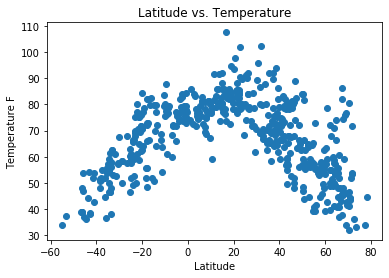

In [123]:
plt.scatter(lati, tempe)
plt.title("Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature F")
plt.show()

## Latitude vs. Humidity Plot

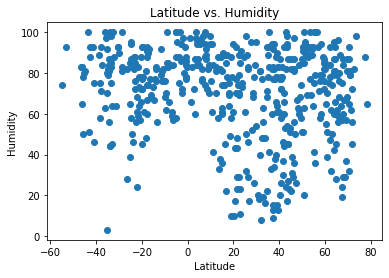

In [124]:
plt.scatter(lati, humid)
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

## Latitude vs. Cloudiness Plot

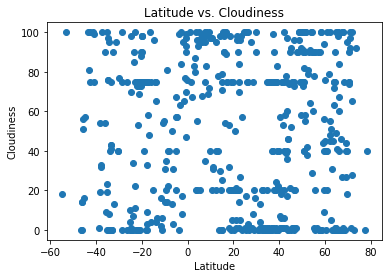

In [125]:
plt.scatter(lati, cloudi)
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

## Latitude vs. Wind Speed Plot

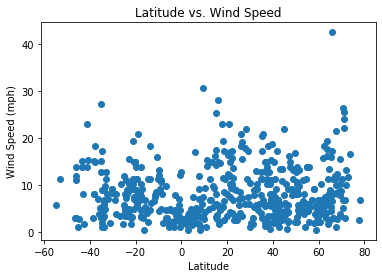

In [126]:
plt.scatter(lati, winds)
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [114]:
# Create Northern and Southern Hemisphere DataFrames
northern = citylistclean.loc[(citylistclean["Lattitude"]>=0)]
southern = citylistclean.loc[(citylistclean["Lattitude"]<0)]
southern 

,City Name,Lattitude,Longitude,Temperature,Humidity,Cloudiness,Windspeed,Country,Date
0,Tuatapere,-46.13,167.68,39.00,83,14,3.00,NZ,1592522702
1,Te Anau,-45.42,167.72,36.82,80,16,1.16,NZ,1592522702
2,Pisco,-13.70,-76.22,64.22,82,75,11.41,PE,1592522450
3,Tarija,-21.54,-64.73,58.89,59,0,3.29,BO,1592522702
5,Mareeba,-17.00,145.43,66.34,92,48,3.00,AU,1592522702
...,...,...,...,...,...,...,...,...,...
481,Antofagasta,-23.65,-70.40,59.00,82,90,8.05,CL,1592522741
483,Inhambupe,-11.78,-38.35,68.61,92,2,6.60,BR,1592522741
494,Rawson,-43.30,-65.10,54.18,51,81,15.23,AR,1592522742
505,Yulara,-25.24,130.99,46.40,39,0,5.82,AU,1592522743


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The linear equation is: y = -0.54x + 89.71
The r-squared is: 0.5133254658964109


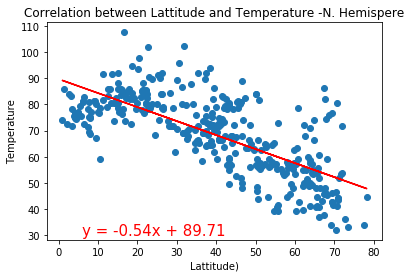

In [128]:
x = northern["Lattitude"]
y = northern["Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The linear equation is: {line_eq}")
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,30),fontsize=15,color="red")
plt.xlabel('Lattitude)')
plt.ylabel('Temperature')
plt.title('Correlation between Lattitude and Temperature -N. Hemispere')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The linear equation is: y = 0.8x + 81.34
The r-squared is: 0.6543881322635731


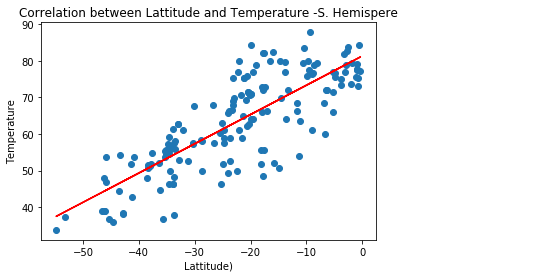

In [148]:
x = southern["Lattitude"]
y = southern["Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The linear equation is: {line_eq}")
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(10,35),fontsize=15,color="red")
plt.xlabel('Lattitude)')
plt.ylabel('Temperature')
plt.title('Correlation between Lattitude and Temperature -S. Hemispere')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The linear equation is: y = -0.04x + 69.71
The r-squared is: 0.0014339259536129123


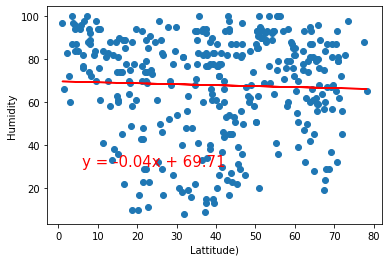

In [138]:
x = northern["Lattitude"]
y = northern["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The linear equation is: {line_eq}")
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,30),fontsize=15,color="red")
plt.xlabel('Lattitude)')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The linear equation is: y = 0.08x + 78.46
The r-squared is: 0.004470328800179234


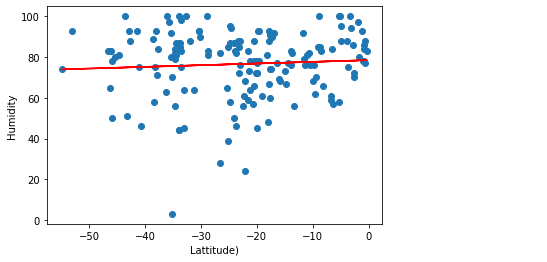

In [139]:
x = southern["Lattitude"]
y = southern["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The linear equation is: {line_eq}")
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,30),fontsize=15,color="red")
plt.xlabel('Lattitude)')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The linear equation is: y = -0.12x + 54.12
The r-squared is: 0.0039566388732911375


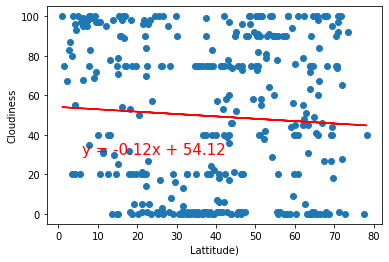

In [140]:
x = northern["Lattitude"]
y = northern["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The linear equation is: {line_eq}")
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,30),fontsize=15,color="red")
plt.xlabel('Lattitude)')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The linear equation is: y = 0.2x + 52.53
The r-squared is: 0.005192536952670487


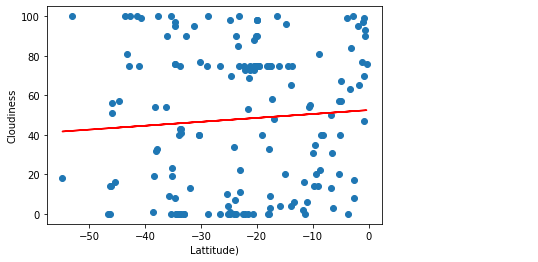

In [141]:
x = southern["Lattitude"]
y = southern["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The linear equation is: {line_eq}")
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,30),fontsize=15,color="red")
plt.xlabel('Lattitude)')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The linear equation is: y = 0.02x + 7.69
The r-squared is: 0.0044470873768100395


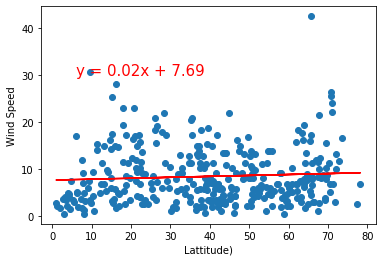

In [144]:
x = northern["Lattitude"]
y = northern["Windspeed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The linear equation is: {line_eq}")
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,30),fontsize=15,color="red")
plt.xlabel('Lattitude)')
plt.ylabel('Wind Speed(mph)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The linear equation is: y = -0.07x + 6.1
The r-squared is: 0.037454768065263024


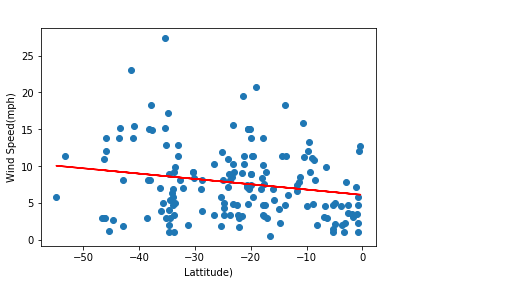

In [145]:
x = southern["Lattitude"]
y = southern["Windspeed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The linear equation is: {line_eq}")
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,30),fontsize=15,color="red")
plt.xlabel('Lattitude)')
plt.ylabel('Wind Speed(mph)')
print(f"The r-squared is: {rvalue**2}")
plt.show()